In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/karan/TCO_County_Stand.csv')

In [3]:
data.isna().sum().sum()

0

In [7]:
data.columns

Index(['WW1', 'WW3', 'WW2', 'WW4', 'WW9', 'WW10', 'WW5', 'WW6', 'WW7', 'WW8',
       'LL1', 'LL2', 'LL3', 'LL4', 'LL5', 'LL6', 'LL7', 'LL8', 'HF1', 'HF2',
       'RR1', 'RR2', 'RR4', 'RR3', 'RR5', 'RR6', 'RR7', 'RR8', 'YES_INJURY',
       'IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'IN6', 'YCA', 'Y19', 'Y20', 'Y21',
       'ST2', 'ST3', 'ST1', 'Crash_ID', 'COUNTY_FIPS', 'CNT', 'INC', 'INO',
       'INS', 'NO_INJURY', 'STATE', 'PPN', 'INR', 'ST', 'LOG_INR', 'INR_S'],
      dtype='object')

In [245]:
cols = ['WW1', 'WW3', 'WW2', 'WW4', 'WW10', 'WW5', 'WW6', 'WW7', 'WW8',
       'LL1', 'LL2', 'LL3', 'LL4', 'LL6', 'LL7', 'LL8', 'HF1', 'HF2',
       'RR1', 'RR2', 'RR4', 'RR3', 'RR5', 'RR6', 'RR7', 'RR8',
       'IN1', 'IN2', 'IN3', 'IN4', 'IN5','ST2', 'ST3']

In [246]:
X = data[cols]

In [247]:
y = data['INR']

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
from sklearn.ensemble import RandomForestRegressor

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= .75, random_state= 42)

In [251]:
rf = RandomForestRegressor(random_state= 42)

In [252]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [253]:
y_pred = rf.predict(X_test)

In [254]:
from sklearn.metrics import r2_score

In [255]:
train = rf.score(X_train,y_train)
train

0.8482250212434937

In [256]:
test = rf.score(X_test,y_test)
test

-0.03104637012344913

In [257]:
r2 = r2_score(y_test,y_pred)
r2

-0.03104637012344913

In [258]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [259]:
mse = mean_squared_error(y_test,y_pred)
mse

2637095.9305512393

In [260]:
mae = mean_absolute_error(y_test, y_pred)
mae

435.22451493757814

In [261]:
rmse = np.sqrt(mse)
rmse

1623.9137694321207

In [262]:
importance = rf.feature_importances_

In [263]:
feature_importances = pd.DataFrame({
    'Feature': cols,
    'Importance': importance
})


In [264]:
feature_importances = feature_importances.sort_values(by='Importance',ascending= False)

In [265]:
feature_importances

,Feature,Importance
21,RR3,2.190131e-01
4,WW10,1.869161e-01
25,RR8,1.565733e-01
14,LL7,8.863476e-02
1,WW3,3.892587e-02
10,LL2,3.486724e-02
9,LL1,2.986059e-02
16,HF1,2.696314e-02
20,RR4,2.545679e-02
5,WW5,2.168785e-02


In [266]:
import matplotlib.pyplot as plt

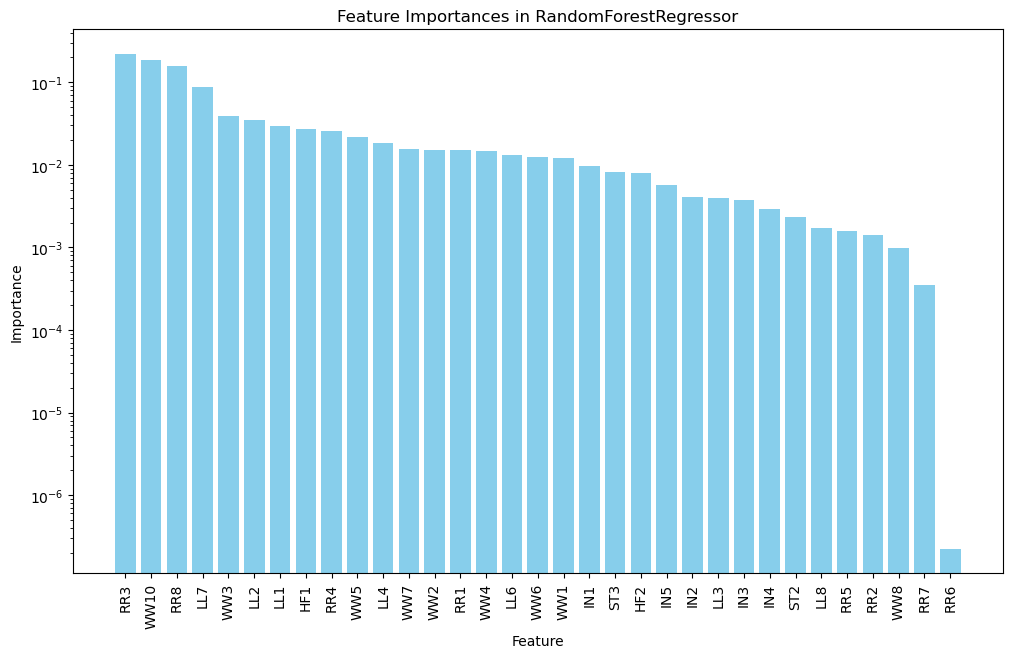

In [267]:
plt.figure(figsize=(12, 8))  # Increase the figure size for better visibility
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in RandomForestRegressor')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to provide space for x-axis labels
plt.show()

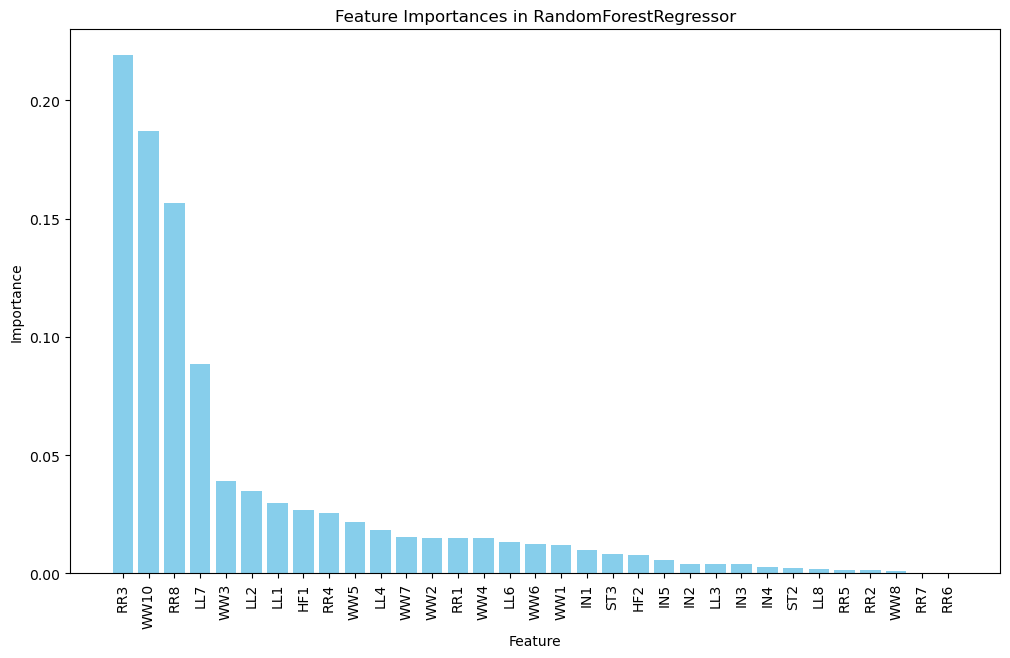

In [268]:
plt.figure(figsize=(12, 8))  # Increase the figure size for better visibility
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in RandomForestRegressor')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.subplots_adjust(bottom=0.2)  # Adjust the bottom margin to provide space for x-axis labels
plt.show()

In [269]:
data

,WW1,WW3,WW2,WW4,WW9,WW10,WW5,WW6,WW7,WW8,...,PPN,INR,ST,LOG_INR,INR_S,AIN,ADN,DIN,MIN,MDIN
0,0.200252,1.105542,-0.942190,-0.588432,-0.345183,-0.878377,-0.233064,-0.425076,-0.481266,1.393408,...,839238,339.593774,1,5.827750,-0.217915,0.307868,0.047436,0.034178,0.352656,-0.082078
1,-0.159645,0.169683,0.487120,-0.448252,-0.351857,0.875734,-0.336131,-0.431485,-0.483703,0.392183,...,35529,360.269076,1,5.886851,-0.200763,0.307868,0.047436,0.034178,0.352656,-0.082078
2,-0.153825,0.411230,0.025274,-0.501145,-0.349574,0.605984,-0.328777,-0.379666,-0.480748,0.246918,...,2635516,376.928085,1,5.932054,-0.186943,0.307868,0.047436,0.034178,0.352656,-0.082078
3,0.383412,0.600505,0.057832,-0.113251,-0.345898,-0.563845,-0.212982,-0.189726,-0.476633,0.474526,...,310569,513.895463,1,6.242020,-0.073317,0.307868,0.047436,0.034178,0.352656,-0.082078
4,-0.156354,0.300858,0.431593,-0.384729,-0.351153,0.285797,-0.329199,-0.428554,-0.483703,1.720866,...,4713325,286.994850,1,5.659464,-0.261550,0.307868,0.047436,0.034178,0.352656,-0.082078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,-0.159645,0.407729,-0.192016,0.161832,-0.351857,-0.417156,-0.336131,-0.431485,0.897509,-0.176092,...,6442,388.078237,2,5.961207,-0.177693,0.307868,0.047436,0.034178,0.352656,-0.082078
1181,-0.159645,0.499528,-1.463749,-0.601903,-0.351857,-0.894357,9.579156,-0.431485,-0.483703,-0.176092,...,3490,286.532951,2,5.657854,-0.261933,0.307868,0.047436,0.034178,0.352656,-0.082078
1182,9.491873,0.602662,-0.993761,-0.601903,-0.351857,-1.401383,-0.336131,-0.431485,1.149731,-0.176092,...,7395,351.588911,2,5.862463,-0.207964,0.307868,0.047436,0.034178,0.352656,-0.082078
1183,-0.159645,0.948974,-1.463749,2.860363,-0.351857,-1.401383,2.780103,-0.431485,-0.483703,-0.176092,...,1719,523.560209,2,6.260652,-0.065299,0.307868,0.047436,0.034178,0.352656,-0.082078


In [194]:
data['AIN'] = data['IN1'].corr(data['HF1'])

In [164]:
data['ADN'] = data['IN2'].corr(data['HF1'])

In [165]:
data['DIN'] = data['IN3'].corr(data['HF1'])

In [166]:
data['MIN'] = data['IN4'].corr(data['HF1'])

In [167]:
data['MDIN'] = data['IN5'].corr(data['HF1'])

In [168]:
data.to_csv('tco_county_intr.csv',index= False)